In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('bank_data_marketing.csv')

In [2]:
df.shape

(4119, 17)

In [3]:
print("Initial DataFrame:")
print(df.head())

Initial DataFrame:
   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     campaign     pdays previous     poutcome  emp.var.rate cons.price.idx  \
0  Campaign-2  999-Days        0  nonexistent          -1.8         92.893   
1  Campaign-4  999-Days        0  nonexistent           1.1         93.994   
2  Campaign-1  999-Days        0  nonexistent           1.4         94.465   
3  Campaign-3  999-Days        0  nonexistent           1.4         94.465   
4  Campaign-1  999-Days        0  nonexistent          -0.1           93.2   

   cons.conf.idx pred_subs euribor3m nr.employed 

In [4]:

print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age               0
job               2
marital           1
education         1
default           0
housing           0
loan              0
campaign          3
pdays             0
previous          0
poutcome          2
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
pred_subs         1
euribor3m         0
nr.employed       2
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4118 non-null   object 
 3   education       4118 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   campaign        4116 non-null   object 
 8   pdays           4119 non-null   object 
 9   previous        4119 non-null   object 
 10  poutcome        4117 non-null   object 
 11  emp.var.rate    4119 non-null   float64
 12  cons.price.idx  4119 non-null   object 
 13  cons.conf.idx   4119 non-null   float64
 14  pred_subs       4118 non-null   object 
 15  euribor3m       4119 non-null   object 
 16  nr.employed     4117 non-null   object 
dtypes: float64(2), int64(1), object(1

In [1]:
df = df.dropna().reset_index(drop=True)

NameError: name 'df' is not defined

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4108 entries, 0 to 4107
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4108 non-null   int64  
 1   job             4108 non-null   object 
 2   marital         4108 non-null   object 
 3   education       4108 non-null   object 
 4   default         4108 non-null   object 
 5   housing         4108 non-null   object 
 6   loan            4108 non-null   object 
 7   campaign        4108 non-null   object 
 8   pdays           4108 non-null   object 
 9   previous        4108 non-null   object 
 10  poutcome        4108 non-null   object 
 11  emp.var.rate    4108 non-null   float64
 12  cons.price.idx  4108 non-null   object 
 13  cons.conf.idx   4108 non-null   float64
 14  pred_subs       4108 non-null   object 
 15  euribor3m       4108 non-null   object 
 16  nr.employed     4108 non-null   object 
dtypes: float64(2), int64(1), object(1

In [8]:
for i in df.select_dtypes(include='object'):
    print(i,"====",df[i].unique())

job ==== ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital ==== ['married' 'single' 'divorced' 'unknown']
education ==== ['basic.9y' 'high.school' 'university.degree' 'basic.6y' 'basic.4y'
 'professional.course' 'unknown' '"' '23%' 'illiterate']
default ==== ['no' 'unknown' 'yes']
housing ==== ['yes' 'no' 'unknown' '$' 'Appolo']
loan ==== ['no' 'unknown' 'yes' '$%' '$' '&']
campaign ==== ['Campaign-2' 'Campaign-4' 'Campaign-1' 'Campaign-3' 'Campaign-6'
 'Campaign-7' 'Campaign-27' 'Campaign-5' 'Campaign-12' 'Campaign-14'
 'Campaign-10' 'Campaign-11' 'Campaign-13' 'Campaign-8' 'Campaign-9'
 'Campaign-15' 'Campaign-16' 'Campaign-18' 'Campaign-17' 'Campaign-22'
 'Campaign-19' 'Campaign-23' 'Campaign-24' 'Campaign-35' 'Campaign-29']
pdays ==== ['999-Days' '12-Days' '3-Days' '6-Days' '5-Days' '2-Days' '@-Days'
 '10-Days' '11-Days' '7-Days' '1-Days' '18-Days' '4-Days' '15-Days'
 '0-Days

In [9]:
df['euribor3m'].value_counts()

euribor3m
4.857    273
4.963    256
4.962    237
4.961    212
4.856    138
        ... 
1.629      1
0.889      1
4.343      1
0.749      1
0.965      1
Name: count, Length: 235, dtype: int64

In [10]:
#removing noise from data
df['education']=df['education'].replace({'"': 'unknown', '23%': 'unknown'})

df['housing']=df['housing'].replace({'$': 'unknown', 'Appolo': 'unknown'})

df['loan']=df['loan'].replace({'$': 'unknown', '$%': 'unknown', '&':'unknown'})

In [11]:
df['campaign'] = df['campaign'].str.extract('(\d+)').astype(int)

In [12]:
df['pdays'] = df['pdays'].str.extract('(\d+)').astype(float)

In [13]:
df= df[df['previous'].str.isdigit()]
df['previous'] = df['previous'].astype(int)

In [14]:

df['poutcome']=df['poutcome'].replace({'&&': 'nonexistent', '*': 'nonexistent', '%':'nonexistent', 'Q998': 'nonexistent', '||':'nonexistent'})

In [15]:
df['cons.price.idx'] = df['cons.price.idx'].astype(str)

df['cons.price.idx'] = df['cons.price.idx'].str.replace(r'[^0-9.]', '', regex=True)

df['cons.price.idx'] = df['cons.price.idx'].replace('', np.nan)

df['cons.price.idx'] = df['cons.price.idx'].astype(float)

# Optionally, you can drop rows with NaN values if you don't want them in your dataset
# df = df.dropna(subset=['cons.price.idx'])

In [16]:
df['nr.employed'] = df['nr.employed'].astype(str)

df['nr.employed'] = df['nr.employed'].str.replace(r'[^0-9.]', '', regex=True)

df['nr.employed'] = df['nr.employed'].replace('', np.nan)

df['nr.employed'] = df['nr.employed'].astype(float)

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,2,999.0,0,nonexistent,-1.8,92.893,-46.2,no,1.313,5099.1
1,39,services,single,high.school,no,no,no,4,999.0,0,nonexistent,1.1,93.994,-36.4,no,4.855,5191.0
2,25,services,married,high.school,no,yes,no,1,999.0,0,nonexistent,1.4,94.465,-41.8,no,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,3,999.0,0,nonexistent,1.4,94.465,-41.8,no,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,1,999.0,0,nonexistent,-0.1,93.200,-42.0,no,4.191,5195.8


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4107 entries, 0 to 4107
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4107 non-null   int64  
 1   job             4107 non-null   object 
 2   marital         4107 non-null   object 
 3   education       4107 non-null   object 
 4   default         4107 non-null   object 
 5   housing         4107 non-null   object 
 6   loan            4107 non-null   object 
 7   campaign        4107 non-null   int32  
 8   pdays           4105 non-null   float64
 9   previous        4107 non-null   int32  
 10  poutcome        4107 non-null   object 
 11  emp.var.rate    4107 non-null   float64
 12  cons.price.idx  4104 non-null   float64
 13  cons.conf.idx   4107 non-null   float64
 14  pred_subs       4107 non-null   object 
 15  euribor3m       4107 non-null   object 
 16  nr.employed     4104 non-null   float64
dtypes: float64(5), int32(2), int64(1), obj

In [19]:
df = df.dropna().reset_index(drop=True)

In [20]:
df['euribor3m'] = pd.to_numeric(df['euribor3m'], errors='coerce')

df['euribor3m'].fillna(df['euribor3m'].mean(), inplace=True)

df['euribor3m'] = df['euribor3m'].astype(float)

In [21]:
#df = df[df['default'].isin(['no', 'yes'])]

# above all is process for cleaning

In [22]:
for i in df.select_dtypes(include='object'):
    print(i,"====",df[i].unique())

job ==== ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital ==== ['married' 'single' 'divorced' 'unknown']
education ==== ['basic.9y' 'high.school' 'university.degree' 'basic.6y' 'basic.4y'
 'professional.course' 'unknown' 'illiterate']
default ==== ['no' 'unknown' 'yes']
housing ==== ['yes' 'no' 'unknown']
loan ==== ['no' 'unknown' 'yes']
poutcome ==== ['nonexistent' 'failure' 'success']
pred_subs ==== ['no' 'yes']


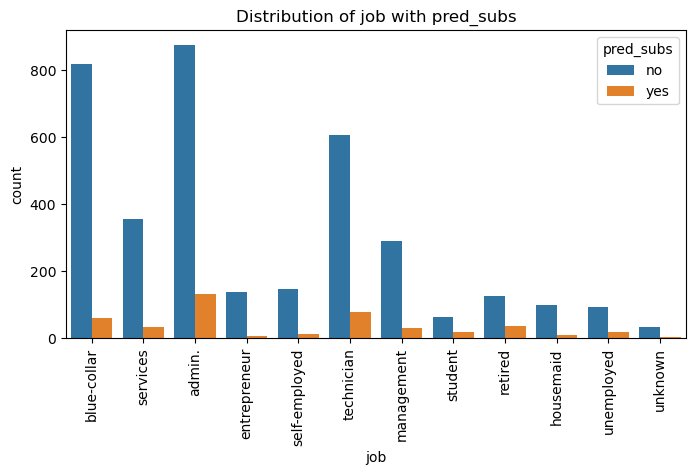

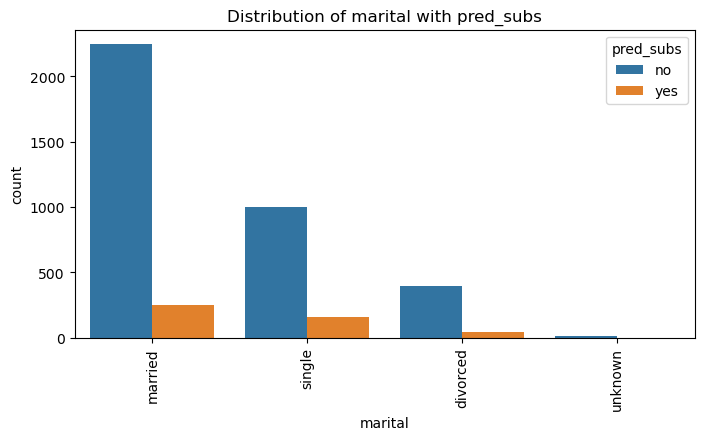

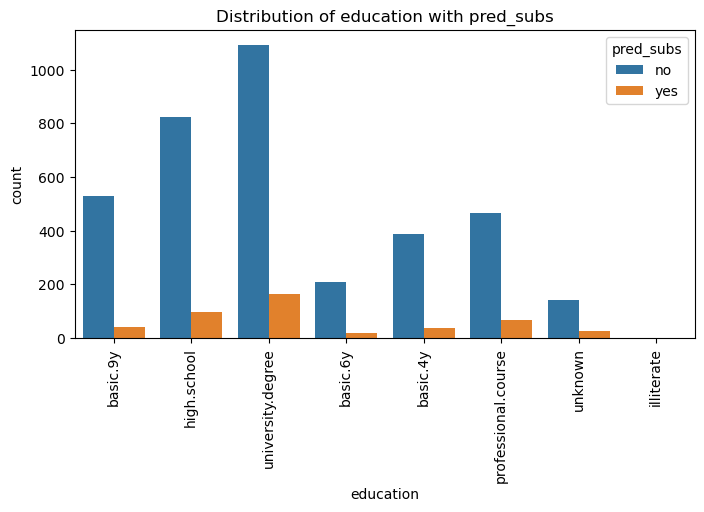

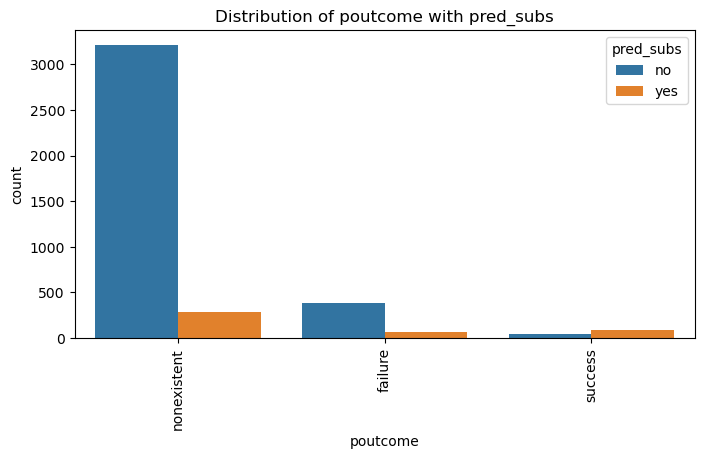

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['job', 'marital', 'education', 'poutcome']

for col in columns:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='pred_subs', data=df)
    plt.title(f'Distribution of {col} with pred_subs')
    plt.xticks(rotation=90)
    plt.show()


In [24]:
int_cols = df.select_dtypes(include=['float', 'int'])

correlat_mat = int_cols.corr()

correlat_mat

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.015655,-0.044098,0.052402,-0.019490,0.002359,0.099631,-0.015076,-0.042322
campaign,-0.015655,1.000000,0.058829,-0.091101,0.175414,0.070939,0.007597,0.158987,0.160802
pdays,-0.044098,0.058829,1.000000,-0.588314,0.270698,0.027080,-0.092129,0.301474,0.382007
previous,0.052402,-0.091101,-0.588314,1.000000,-0.414881,-0.079033,-0.050963,-0.458601,-0.514848
emp.var.rate,-0.019490,0.175414,0.270698,-0.414881,1.000000,0.401184,0.194619,0.970314,0.897126
cons.price.idx,0.002359,0.070939,0.027080,-0.079033,0.401184,1.000000,0.039408,0.352900,0.252965
cons.conf.idx,0.099631,0.007597,-0.092129,-0.050963,0.194619,0.039408,1.000000,0.276418,0.107029
euribor3m,-0.015076,0.158987,0.301474,-0.458601,0.970314,0.352900,0.276418,1.000000,0.942508
nr.employed,-0.042322,0.160802,0.382007,-0.514848,0.897126,0.252965,0.107029,0.942508,1.000000


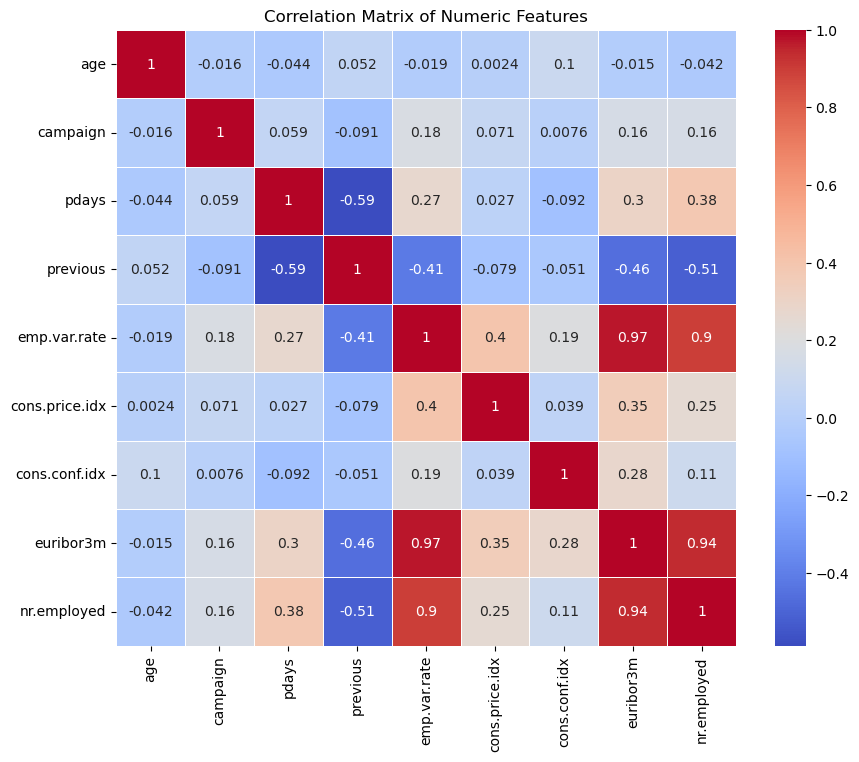

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlat_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [26]:
df=df.drop(columns=['emp.var.rate','nr.employed']) 
# we have dropped these columns because of high multicollinearity (corr coef is 0.89,0.94)

In [27]:
int_cols = df.select_dtypes(include=['float', 'int'])

correlat_mat = int_cols.corr()

correlat_mat

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
age,1.000000,-0.015655,-0.044098,0.052402,0.002359,0.099631,-0.015076
campaign,-0.015655,1.000000,0.058829,-0.091101,0.070939,0.007597,0.158987
pdays,-0.044098,0.058829,1.000000,-0.588314,0.027080,-0.092129,0.301474
previous,0.052402,-0.091101,-0.588314,1.000000,-0.079033,-0.050963,-0.458601
cons.price.idx,0.002359,0.070939,0.027080,-0.079033,1.000000,0.039408,0.352900
cons.conf.idx,0.099631,0.007597,-0.092129,-0.050963,0.039408,1.000000,0.276418
euribor3m,-0.015076,0.158987,0.301474,-0.458601,0.352900,0.276418,1.000000


In [28]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
cols= df.select_dtypes(include='object').columns
for col in cols:
    df[col]=lc.fit_transform(df[col])


In [29]:
df.head(10)

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,pred_subs,euribor3m
0,30,1,1,2,0,2,0,2,999.0,0,1,92.893,-46.2,0,1.313
1,39,7,2,3,0,0,0,4,999.0,0,1,93.994,-36.4,0,4.855
2,25,7,1,3,0,2,0,1,999.0,0,1,94.465,-41.8,0,4.962
3,38,7,1,2,0,1,1,3,999.0,0,1,94.465,-41.8,0,4.959
4,47,0,1,6,0,2,0,1,999.0,0,1,93.200,-42.0,0,4.191
5,32,7,2,6,0,0,0,3,999.0,2,0,94.199,-37.5,0,0.884
6,32,0,2,6,0,2,0,4,999.0,0,1,94.199,-37.5,0,0.879
7,41,2,1,6,1,2,0,2,999.0,0,1,93.200,-42.0,0,4.191
8,35,1,1,2,1,0,0,1,999.0,0,1,93.994,-36.4,0,4.855
9,25,7,2,1,1,2,0,1,999.0,0,1,93.918,-42.7,0,4.958


In [30]:
x=df.drop(columns='euribor3m')
print(x.shape)
y=df['euribor3m']
print(y.shape)

(4099, 14)
(4099,)


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("x_train shape :",x_train.shape)
print("x_test shape :",x_test.shape)
print("y_train shape :",y_train.shape)
print("y_test shape :",y_test.shape)


x_train shape : (3279, 14)
x_test shape : (820, 14)
y_train shape : (3279,)
y_test shape : (820,)


In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=model.predict(x_test)
print(y_pred[:5])
y_pred.shape

[1.72223393 4.44744365 1.98473472 4.2762881  3.97553564]


(820,)

In [35]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y_test,y_pred)
print("mse :",mse)

r2=r2_score(y_test,y_pred)
print("r2 Score :",r2)

mse : 1.5490991791256568
r2 Score : 0.4912164019879115


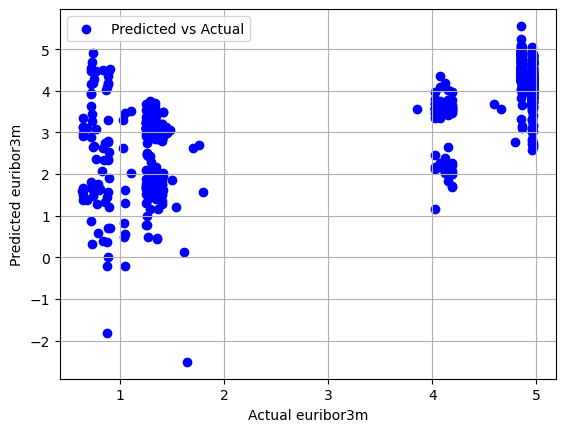

In [36]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual euribor3m')
plt.ylabel('Predicted euribor3m')
plt.legend()
plt.grid()
plt.show()

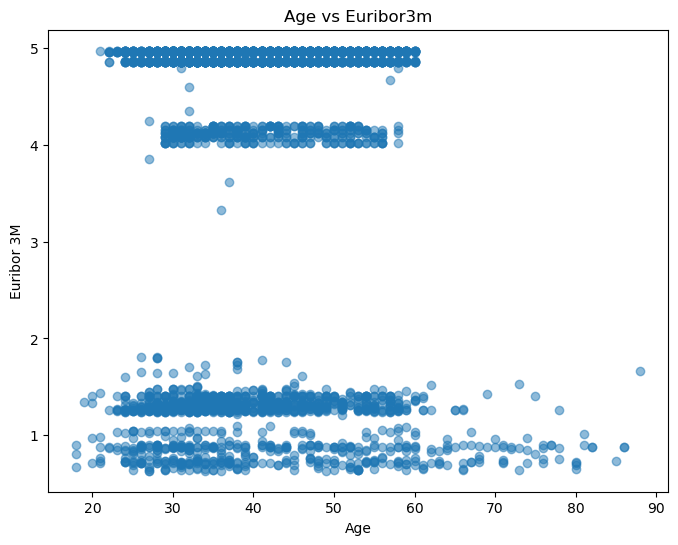

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(df['age'], df['euribor3m'], alpha=0.5)
plt.title('Age vs Euribor3m')
plt.xlabel('Age')
plt.ylabel('Euribor 3M')
plt.show()

#plot below explains that erribor3m(interest rate at which bank lend money ) does not change according to age, 
# every age as has almost same impact from interest rates  as we can't see a proper pattern


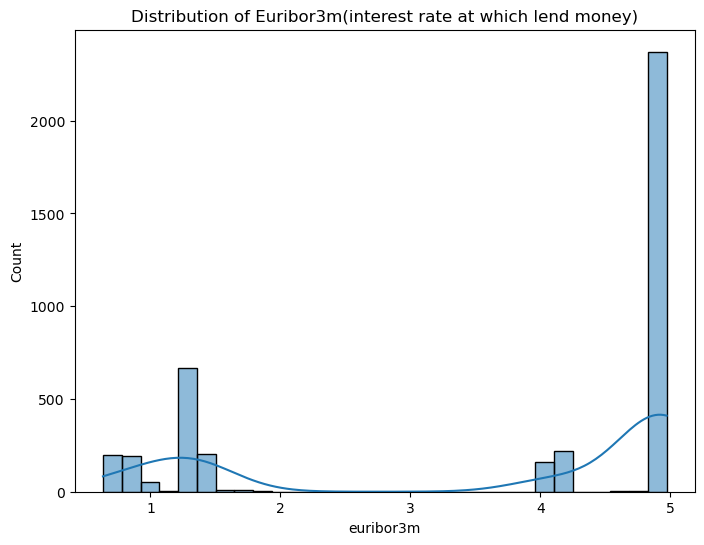

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(df['euribor3m'], kde=True, bins=30)
plt.title('Distribution of Euribor3m(interest rate at which banks lend money)')
plt.show()



In [39]:
''' conclusion :- Linear Regression is not suitable model for this as we are mainly focused on pred subs so we will go for 
 classification  modelling (logistic regression)
'''

' conclusion :- Linear Regression is not suitable model for this as we are mainly focused on pred subs so we will go for \n classification  modelling (logistic regression)\n'

In [69]:
X=df.drop(columns='pred_subs').values
print(X)
print(X.shape)
Y=df['pred_subs'].values.reshape(-1,1)
print(Y.shape)

[[ 30.      1.      1.    ...  92.893 -46.2     1.313]
 [ 39.      7.      2.    ...  93.994 -36.4     4.855]
 [ 25.      7.      1.    ...  94.465 -41.8     4.962]
 ...
 [ 27.      8.      2.    ...  92.893 -46.2     1.354]
 [ 58.      0.      1.    ...  93.444 -36.1     4.966]
 [ 34.      4.      2.    ...  93.2   -42.      4.12 ]]
(4099, 14)
(4099, 1)


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print("x_train shape :",X_train.shape)
print("x_test shape :",X_test.shape)
print("y_train shape :",Y_train.shape)
print("y_test shape :",Y_test.shape)

x_train shape : (3074, 14)
x_test shape : (1025, 14)
y_train shape : (3074, 1)
y_test shape : (1025, 1)


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, Y_train)


e:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [82]:
Y_pred=model.predict(X_test_scaled)
print(Y_pred[:100])
Y_pred.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


(1025,)

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score
#accuracy formula=(tp+tn/tp+tn+fp+fn)
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.911219512195122


In [87]:
cf=confusion_matrix(Y_test,Y_pred)
cf

array([[903,   9],
       [ 82,  31]], dtype=int64)

<Axes: >

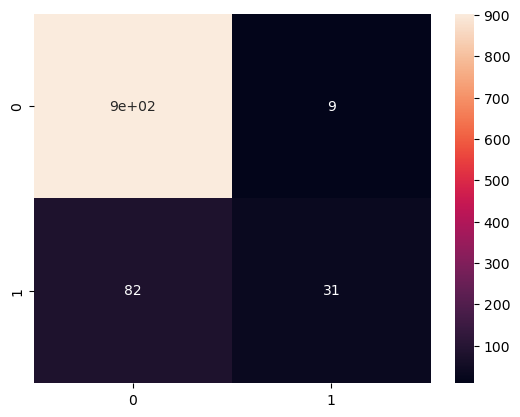

In [91]:
import seaborn as sns
sns.heatmap(cf,annot=True)

In [97]:
df['pred_subs'].value_counts()

pred_subs
0    3650
1     449
Name: count, dtype: int64

In [ ]:
# conclusion:- we are getting high accuracy from model beacuse  high proportion of data on dependent column
# (pred_subs) are 0(NO) which are 3650/4099 so most of the values are going to be predicted as No which can lead to high accuracy
#because of high frequency of no predictions , if you want to proceed furthur you need to go for undersampling or oversampling